# Исследование надежности заемщиков

**Цель проекта:**  
На основании данных, предоставленных кредитным отделом банка, нужно выяснить, как социальный статус заемщиков влияет на их способность погасить кредит в срок. 

**Задачи проекта:**  
1) Изучить предоставленные данные  
2) Предобработать предоставленные данные  
3) Выяснить влияние  
    - количества детей  
    - семейного положения  
    - уровня дохода  
    заемщика на его способность вернуть кредит в срок.  
4) Провести обобщение результатов исследования

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Удаление-пропусков-(продолжение)" data-toc-modified-id="Удаление-пропусков-(продолжение)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление пропусков (продолжение)</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между количеством детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns

## Общая информация о данных

In [2]:
data = pd.read_csv('data.csv')

**Описание колонок датафрейма, предоставленное заказчиком:**  
    `children` — количество детей в семье  
    `days_employed` — общий трудовой стаж в днях  
    `dob_years` — возраст клиента в годах  
    `education` — уровень образования клиента  
    `education_id` — идентификатор уровня образования  
    `family_status` — семейное положение  
    `family_status_id` — идентификатор семейного положения  
    `gender` — пол клиента  
    `income_type` — тип занятости  
    `debt` — имел ли задолженность по возврату кредитов  
    `total_income` — ежемесячный доход  
    `purpose` — цель получения кредита  

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Все колонки для количественных переменных имеют числовой тип. С этими данными можно проводить дальнейшие математические вычисления.

## Предобработка данных

### Удаление пропусков

Оценим количество пропущенных значений для каждого столбца.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [7]:
data.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,2.152500e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.652253e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,9.804367e+04,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.077982e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.425944e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,1.955499e+05,NaN


Отрицательное количество дней трудового стажа в столбце `days_employed`. Заменим все отрицательные значения модулем.

In [8]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) аномально большие значения `days_employed`. Исправить такие значения сложно, поэтому не будем ислользовать эту информацию при дальнейшем анализе.

Выведем перечень уникальных значений столбца `children`.

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Есть два аномальных значения -1 и 20. Удалим строки, в которых они встречаются.

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. 

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [15]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

В столбце `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [16]:
data['education'] = data['education'].str.lower()

Посчитаем количество строк-дубликатов в данных и удалим эти строки.

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов столбца `total_income`, указанных ниже, создадим с помощью функции `categorize_income()` в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Рассмотрим перечень уникальных целей взятия кредита из столбца `purpose`.

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию `categorize_purpose()`, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
# знакомимся со структурой датафрейма после предобработки данных
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [25]:
def table(df, group_list, agg_dict, col_names_list):
    '''
    Функция для построения сводных таблиц.
    '''

    # группируем датафрейм df по значениям колонки из group_list
    # проводим аггрегацию согласно словарю agg_dict
    df_table = df.groupby(group_list).agg(agg_dict).reset_index()
    df_table = df_table.droplevel(0, axis=1)

    # переименовываем колонки датафрейма согласно списку col_names_list
    rename_dict = dict(zip(df_table.columns, col_names_list))
    df_table.rename(rename_dict, axis='columns', inplace=True)
  
    return df_table

In [26]:
# группируем датафрейм data по значениям колонки 'children' (количеству детей)
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) 
# и ошибку среднего для каждой группы
# вычисляем общее количество строк (количество заемщиков) для каждой группы

group_list  = ['children']
agg_dict  = {'debt' : ['mean', 'sem', 'count']}
col_names_list = ['Количество детей', 'Доля невозвратов', 'Стандартная ошибка среднего', 'Общее кол-во заемщиков']
col_formats_list = ['{:}', '{:,.2%}', '{:,.2%}', '{:}']
    
df_children = table(data, group_list, agg_dict, col_names_list)

# форматируем колонки датафрейма из списка col_names_list согласно списку col_formats_list
df_children.style.format(dict(zip(col_names_list, col_formats_list)))

,Количество детей,Доля невозвратов,Стандартная ошибка среднего,Общее кол-во заемщиков
0,0,7.54%,0.22%,14091
1,1,9.23%,0.42%,4808
2,2,9.45%,0.65%,2052
3,3,8.18%,1.51%,330
4,4,9.76%,4.69%,41
5,5,0.00%,0.00%,9


**Обратите внимание:** \
Выборки для заемщиков с 4 или 5 детьми **не репрезентативны** (очень мало данных, чтобы сравнивать кредитоспособность таких заемщиков с людьми, имеющими меньшее количество детей):  

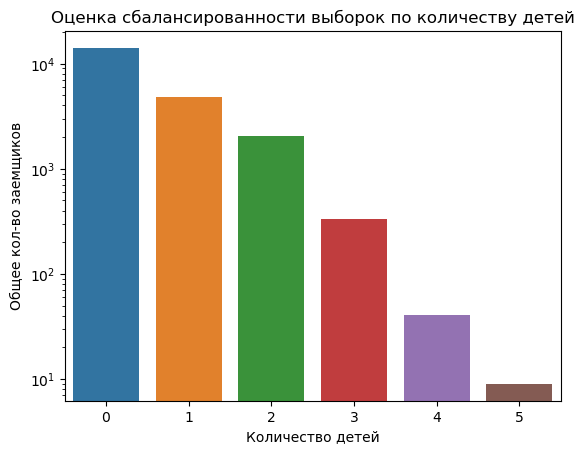

In [27]:
sns.barplot(data=df_children, 
            x='Количество детей', 
            y='Общее кол-во заемщиков', 
            log=True).set(title='Оценка сбалансированности выборок по количеству детей')
None

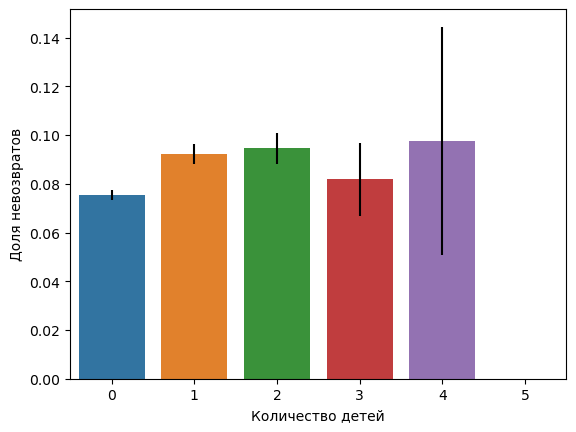

In [28]:
sns.barplot(data=df_children, y='Доля невозвратов', x='Количество детей', 
            yerr=df_children['Стандартная ошибка среднего'])
None

**Вывод:** \
Если не учитывать малое количество случаев с 4 и 5 детьми, и рассматривать заемщиков с 0, 1 и 2 детьми, то вероятность возврата кредита в срок уменьшается с ростом количества детей.   
Влияние количества детей на возврат кредита в срок становится более выраженным если сравнивать данные для заемщиков с одинаковым семейным положением (см. п. **3.2**).

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
# группируем датафрейм по значениям колонки 'family_status' (Семейное положение)
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) 
# и ошибку среднего для каждой группы
# вычисляем общее количество строк (количество заемщиков) для каждой группы

group_list  = ['family_status']
agg_dict  = {'debt' : ['mean', 'sem', 'count']}
col_names_list = ['Семейное положение', 'Доля невозвратов', 'Стандартная ошибка среднего', 'Общее кол-во заемщиков']
col_formats_list = ['{:}', '{:,.2%}', '{:,.2%}', '{:}']
    
df_family_status = table(data, group_list, agg_dict, col_names_list).sort_values(by='Доля невозвратов')

# форматируем колонки датафрейма из списка col_names_list согласно списку col_formats_list
df_family_status.style.format(dict(zip(col_names_list, col_formats_list)))

,Семейное положение,Доля невозвратов,Стандартная ошибка среднего,Общее кол-во заемщиков
2,вдовец / вдова,6.62%,0.81%,951
1,в разводе,7.06%,0.74%,1189
4,женат / замужем,7.56%,0.24%,12261
3,гражданский брак,9.31%,0.45%,4134
0,Не женат / не замужем,9.76%,0.56%,2796


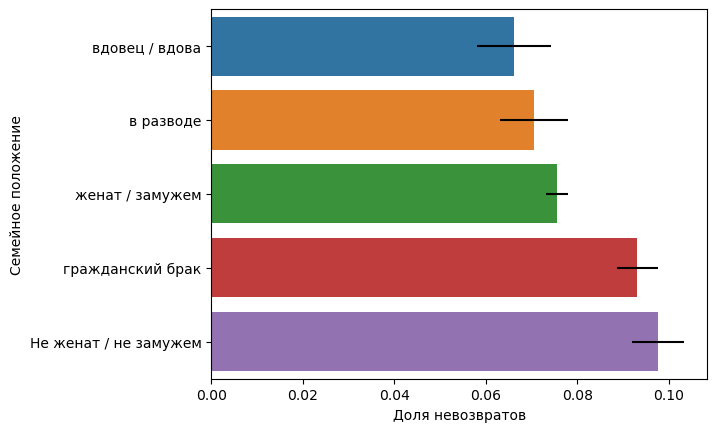

In [30]:
sns.barplot(data=df_family_status, x='Доля невозвратов', y='Семейное положение',
           xerr=df_family_status['Стандартная ошибка среднего'])
None

**Обратим внимание на следующее:**  
1) Неженатые/незамужние или живущие в гражданском браке люди чаще других категорий имеют просроченные задолженности по кредитам. Они в среднем имеют меньше детей, чем замужние/женатые.  
2) В предыдущем пункте мы видели, что заемщики без детей в общем реже допускают просрочку платежа по кредиту.  

Чтобы выяснить, нет ли противоречия между 1 и 2 утверждениями, необходимо сгруппировать результаты по количеству детей и семейному положению.

In [31]:
# группируем датафрейм по значениям колонки 'family_status' (Семейное положение)
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) для каждой группы
# вычисляем общее количество строк (количество заемщиков) для каждой группы

df_family_status2 = data.groupby(['family_status', 'children']).agg({'debt' : 'mean'}).reset_index()
df_family_status2
df_family_status2['debt'] *= 100
df_family_status2 = df_family_status2.round({'debt': 2})
df_family_status2.rename({df_family_status2.columns[0]: 'Семейное положение',
                          df_family_status2.columns[1]: 'Количество детей', 
                          df_family_status2.columns[2]: 'Доля невозвратов, %'}, 
                          axis='columns', inplace=True)

df_family_status2

,Семейное положение,Количество детей,"Доля невозвратов, %"
0,Не женат / не замужем,0,9.28
1,Не женат / не замужем,1,11.58
2,Не женат / не замужем,2,12.00
3,Не женат / не замужем,3,12.50
4,Не женат / не замужем,4,50.00
5,в разводе,0,7.02
6,в разводе,1,6.73
7,в разводе,2,8.64
8,в разводе,3,9.09
9,в разводе,4,0.00


**Вывод:** \
Наибольший процент невозвратов кредита в срок у неженатых/незамужних или живущих в гражданском браке заемщиков, т.е. не имеющих близких отношений или не связавших свои отношения с близким человеком официально.  
    
**Как изменится вывод про влияние количества детей после учета семейного положения заемщика?**  
Теперь по последней таблице можно сказать, что чем больше детей (от 0 до 3) у категорий   
- Не женат / не замужем
- в разводе
- вдовец  

т.е. не имеющих семейную пару, тем меньше вероятность выплаты кредита в срок. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
# группируем датафрейм по значениям колонки 'total_income_category' (Категория дохода)
# вычисляем медианное значение величин 'total_income' (месячный доход) 
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) 
# и ошибку среднего для каждой группы
# вычисляем общее количество строк (количество заемщиков) для каждой группы

group_list  = ['total_income_category']
agg_dict  = {'total_income': 'median', 
             'debt' : ['mean', 'sem', 'count']}

col_names_list = ['Категория дохода', 
                  'Медианный доход заемщиков', 
                  'Доля невозвратов', 
                  'Стандартная ошибка среднего', 
                  'Общее кол-во заемщиков']

col_formats_list = ['{:}', '{:}', '{:,.2%}', '{:,.2%}', '{:}']

df_total_income_category = table(data, group_list, agg_dict, col_names_list)

# форматируем колонки датафрейма из списка col_names_list согласно списку col_formats_list
df_total_income_category.style.format(dict(zip(col_names_list, col_formats_list)))

,Категория дохода,Медианный доход заемщиков,Доля невозвратов,Стандартная ошибка среднего,Общее кол-во заемщиков
0,A,1223042.0,8.00%,5.54%,25
1,B,257558.0,7.06%,0.36%,5014
2,C,130355.0,8.50%,0.22%,15921
3,D,43929.0,6.02%,1.27%,349
4,E,26431.0,9.09%,6.27%,22


**Обратите внимание:** Количество заемщиков в категориях дохода A и E очень малое (не более 30, на два порядка меньше остальных ) и эти выборки могут быть не репрезентативны (см. диаграмму ниже) и по этим категориям не рекомендуется делать оценки.

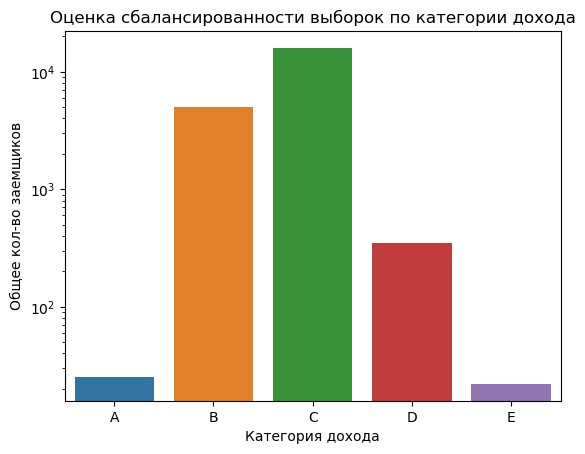

In [33]:
sns.barplot(data=df_total_income_category, 
            x='Категория дохода', 
            y='Общее кол-во заемщиков', log=True)\
            .set(title='Оценка сбалансированности выборок по категории дохода')
None

Как видно из гистограммы ниже, для малочисленных категорий A и E очень большие ошибки среднего, для категории D ошибка также велика (возможно, размер выборки тоже недостаточно большой). Поэтому надежные выводы можно сделать только по категориям B и C.

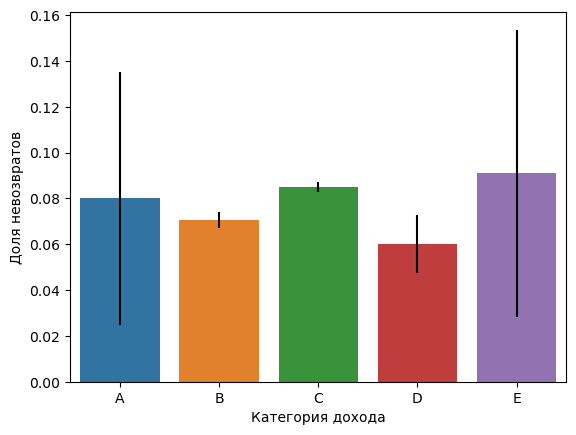

In [34]:
sns.barplot(data=df_total_income_category, y='Доля невозвратов', x='Категория дохода',
           yerr=df_total_income_category['Стандартная ошибка среднего'])
None

**Вывод:** \
Если рассмотреть две самые многочисленные выборки - категории B и С, то заемщики из более обеспеченной категории B в среднем возвращают кредиты в срок чаще. Для категорий A, E и D надежные выводы сделать нельзя, поскольку данных по ним мало.

### Как разные цели кредита влияют на его возврат в срок?

In [35]:
# группируем датафрейм по значениям колонки 'purpose_category' (Цель кредита)
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) 
# и ошибку среднего для каждой группы
# вычисляем общее количество строк (количество заемщиков) для каждой группы

group_list  = ['purpose_category']
agg_dict  = {'debt' : ['mean', 'sem', 'count']}
col_names_list = ['Цель кредита', 'Доля невозвратов', 'Стандартная ошибка среднего', 'Общее кол-во заемщиков']
col_formats_list = ['{:}', '{:,.2%}', '{:,.2%}', '{:}']

df_purpose_category = table(data, group_list, agg_dict, col_names_list).sort_values(by='Доля невозвратов')

# форматируем колонки датафрейма из списка col_names_list согласно списку col_formats_list
df_purpose_category.style.format(dict(zip(col_names_list, col_formats_list)))

,Цель кредита,Доля невозвратов,Стандартная ошибка среднего,Общее кол-во заемщиков
1,операции с недвижимостью,7.26%,0.25%,10751
3,проведение свадьбы,7.91%,0.56%,2313
2,получение образования,9.25%,0.46%,3988
0,операции с автомобилем,9.35%,0.45%,4279


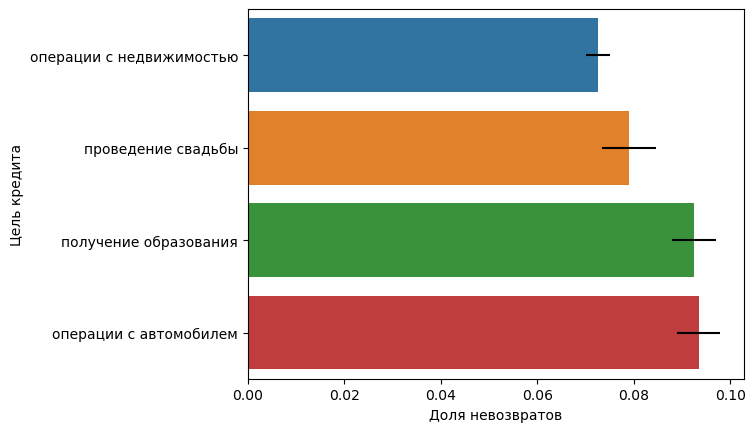

In [36]:
sns.barplot(data=df_purpose_category, x='Доля невозвратов', y='Цель кредита',
           xerr=df_purpose_category['Стандартная ошибка среднего'])
None

**Вывод:** \
Кредиты на операции с недвижимостью и проведение свадьбы возвращают в срок чаще, чем кредиты на покупку автомобиля и получение образования.

Прежде чем сформулировать общий вывод, отметим следующее. Учета единичной величины недостаточно, чтобы оценить кредитоспособность потенциального заемщика. Необходимо разбивать заемщиков на более узкие специфичные группы (как например, совместный учет количества детей и семейного положения в **п. 3.3**).  
Сгруппируем добросовестных заемщиков по их параметрам: составим рейтинг самых исполнительных специфичных категорий численностью минимум 200 человек каждая.

In [37]:
# группируем датафрейм по значениям колонок
# 'total_income_category', 'education', 'family_status', 'income_type', 'purpose_category'
# вычисляем среднее значение величин 'debt' (долю заемщиков, не выплативших кредит в срок) для каждой группы
data_grouped_by_many = data.groupby(['total_income_category', 
                                     'education', 
                                     'family_status', 
                                     'income_type', 
                                     'purpose_category'])['debt'].sum().reset_index()

data_grouped_by_many['total_count'] = data.groupby(['total_income_category', 
                                                    'education', 
                                                    'family_status', 
                                                    'income_type', 
                                                    'purpose_category'])['income_type']\
                                                    .count().reset_index(drop=True)

data_grouped_by_many['mean'] = data.groupby(['total_income_category', 
                                             'education', 
                                             'family_status', 
                                             'income_type', 
                                             'purpose_category'])['debt']\
                                             .mean().reset_index(drop=True) * 100

data_grouped_by_many = data_grouped_by_many.sort_values(by='total_count', ascending=False)

# выбираем категории группировки содержащие достаточное количество записей 'total_count' (200) 
data_grouped_by_many_at_least_200 = data_grouped_by_many.loc[data_grouped_by_many['total_count'] > 200]
# и сортируем их по возрастанию доли просрочек 'mean'
data_grouped_by_many_at_least_200.sort_values(by='mean', ascending=True).head(10)

,total_income_category,education,family_status,income_type,purpose_category,debt,total_count,mean
80,B,высшее,женат / замужем,сотрудник,операции с недвижимостью,7,252,2.777778
73,B,высшее,женат / замужем,компаньон,операции с недвижимостью,9,258,3.488372
419,C,среднее,женат / замужем,пенсионер,операции с автомобилем,13,310,4.193548
420,C,среднее,женат / замужем,пенсионер,операции с недвижимостью,39,775,5.032258
414,C,среднее,женат / замужем,госслужащий,операции с недвижимостью,13,229,5.676856
266,C,высшее,женат / замужем,сотрудник,операции с недвижимостью,32,551,5.807623
193,B,среднее,женат / замужем,компаньон,операции с недвижимостью,18,296,6.081081
260,C,высшее,женат / замужем,компаньон,операции с недвижимостью,18,295,6.101695
417,C,среднее,женат / замужем,компаньон,операции с недвижимостью,44,674,6.528190
421,C,среднее,женат / замужем,пенсионер,получение образования,19,289,6.574394


## Общие выводы

1) Примерно 10% всех записей о доходе и стаже работы заемщиков содержат пропуски. Скорее всего это связано с тем, что от этих заемщиков не требовались эти данные (использовались другие имеющиеся, или они были необязательны, заемщик является зарплатным клиентом банка). При интерпретации результатов исследования следует учитывать, что эти пропуски заменены медианным значением для каждой категории дохода.

2) Для заемщиков с 0, 1 и 2 детьми в среднем вероятность возврата кредита в срок уменьшается с ростом количества детей.  
Если сгруппировать заемщиков по семейному положению, то влияние количества детей на возврат кредита в срок становится более выраженным. Чем больше детей (от 0 до 3) у категорий `Не женат / не замужем`, `в разводе`, `вдовец`, тем меньше вероятность выплаты кредита в срок.

3) Наибольший процент невозвратов кредита в срок у неженатых/незамужних или живущих в гражданском браке заемщиков.

4) Заемщики из более обеспеченной категории B в среднем возвращают кредиты в срок чаще, чем заемщики из категории C.
    
5) Кредиты на операции с недвижимостью и проведение свадьбы в общем возвращают в срок чаще, чем кредиты на покупку автомобиля и получение образования.
    
6) Исходя из рейтинга топ-10 специфичных категорий заемщиков можно заключить, что наиболее надежными заемщиками будут женатые/замужние люди с категорией дохода B-C, высшим/средним образованием, планирующие провести операции с недвижимостью. Вероятность невозврата кредита в срок для них будет в интервале от 3 до 7%.

Если оценивать заемщиков только по категории дохода, то лучшей будет категория D, но ее нет в рейтинге топ-10. Этот пример указывает на несостоятельность категории дохода как отдельного параметра для *индивидуальной* оценки кредитоспособности заемщика.
 
   
7) Полученные связи между характеристиками заемщиков и их кредитоспособностью могут быть использованы для обучения модели, предсказывающей кредитоспособность потенциального заемщика.